# Prediccion depresion en estudiantes

En el entorno académico actual, la salud mental se ha convertido en una prioridad crítica. Este proyecto utiliza técnicas de Machine Learning para analizar un dataset de 100,000 registros estudiantiles, con el objetivo de identificar patrones de comportamiento y factores de riesgo que contribuyen a la depresióntravés del análisis de variables como el rendimiento académico (CGPA), la higiene del sueño, los niveles de estrés y los hábitos digitales, este estudio busca transformar datos estadísticos en herramientas de prevención temprana.
A través del análisis de variables como el rendimiento académico (CGPA), la higiene del sueño, los niveles de estrés y los hábitos digitales, este estudio busca transformar datos estadísticos en herramientas de prevención temprana

## objetivos:
Identificar los predictores clave: Determinar el peso real de factores como la falta de sueño y el estrés crónico en la salud mental [cite: 2026-02-07].

Optimizar la detección: Desarrollar un modelo que priorice la captura de casos positivos sobre la precisión general.

Simulación Funcional: Crear una herramienta interactiva que permita a los departamentos de bienestar estudiantil evaluar perfiles de riesgo en tiempo real.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import ast
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [3]:
df = pd.read_csv('student_lifestyle_100k.csv')
df.head(10)

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,1001,22,Female,Science,3.50,7.3,3.3,3.4,114,5,False
1,1002,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,False
2,1003,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,False
3,1004,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,False
4,1005,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,False
5,1006,22,Female,Medical,3.31,6.5,3.5,4.1,129,2,False
6,1007,18,Male,Science,2.14,4.4,4.0,3.1,73,8,True
7,1008,18,Male,Engineering,3.27,7.0,3.4,7.6,68,4,False
8,1009,21,Male,Business,2.71,4.8,8.6,0.3,82,5,False
9,1010,24,Male,Engineering,3.36,5.7,1.5,3.7,59,3,False


## Descripcion del Dataset
**Student_ID:** Unique identifier for each student.

**Age:** Age of the student (18-24).

**Gender:** Gender of the student (Male/Female).

**Department:** Field of study (Engineering, Business, Arts, etc.).

**CGPA:** Cumulative Grade Point Average (0.0 - 4.0).

**Sleep_Duration:** Average hours of sleep per night.

**Study_Hours:** Average hours spent studying per day.Study_Hours:** Average hours spent studying per day.

**Social_Media_Hours:** Average hours spent on social media per day.

**Physical_Activity:** Average minutes of physical activity per week.

**Stress_Level:** Self-reported stress level (scale 0-10).

**Depression:** Mental health status (True = Probable Depression, False = Healthy). 

In [3]:
print("----INFORMACION GENERAL:----\n")
df.info()
print("\n--- Valores Nulos por Columna ---")
print(df.isnull().sum())
print("\n--- Resumen Estadístico ---")
display(df.describe())

----INFORMACION GENERAL:----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Student_ID          100000 non-null  int64  
 1   Age                 100000 non-null  int64  
 2   Gender              100000 non-null  object 
 3   Department          100000 non-null  object 
 4   CGPA                100000 non-null  float64
 5   Sleep_Duration      100000 non-null  float64
 6   Study_Hours         100000 non-null  float64
 7   Social_Media_Hours  100000 non-null  float64
 8   Physical_Activity   100000 non-null  int64  
 9   Stress_Level        100000 non-null  int64  
 10  Depression          100000 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(2)
memory usage: 7.7+ MB

--- Valores Nulos por Columna ---
Student_ID            0
Age                   0
Gender                0
Department            0
CGPA    

,Student_ID,Age,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,51000.500000,21.009010,2.898316,6.996425,4.509517,3.503288,74.353180,4.131660
std,28867.657797,2.000382,0.532240,1.498682,1.976076,1.486852,43.366963,1.424151
min,1001.000000,18.000000,1.560000,3.000000,0.000000,0.000000,0.000000,2.000000
25%,26000.750000,19.000000,2.450000,6.000000,3.200000,2.500000,37.000000,3.000000
50%,51000.500000,21.000000,2.900000,7.000000,4.500000,3.500000,74.000000,4.000000
75%,76000.250000,23.000000,3.350000,8.000000,5.800000,4.500000,112.000000,5.000000
max,101000.000000,24.000000,4.000000,12.000000,12.800000,10.000000,149.000000,10.000000


# Analisis de Outliers

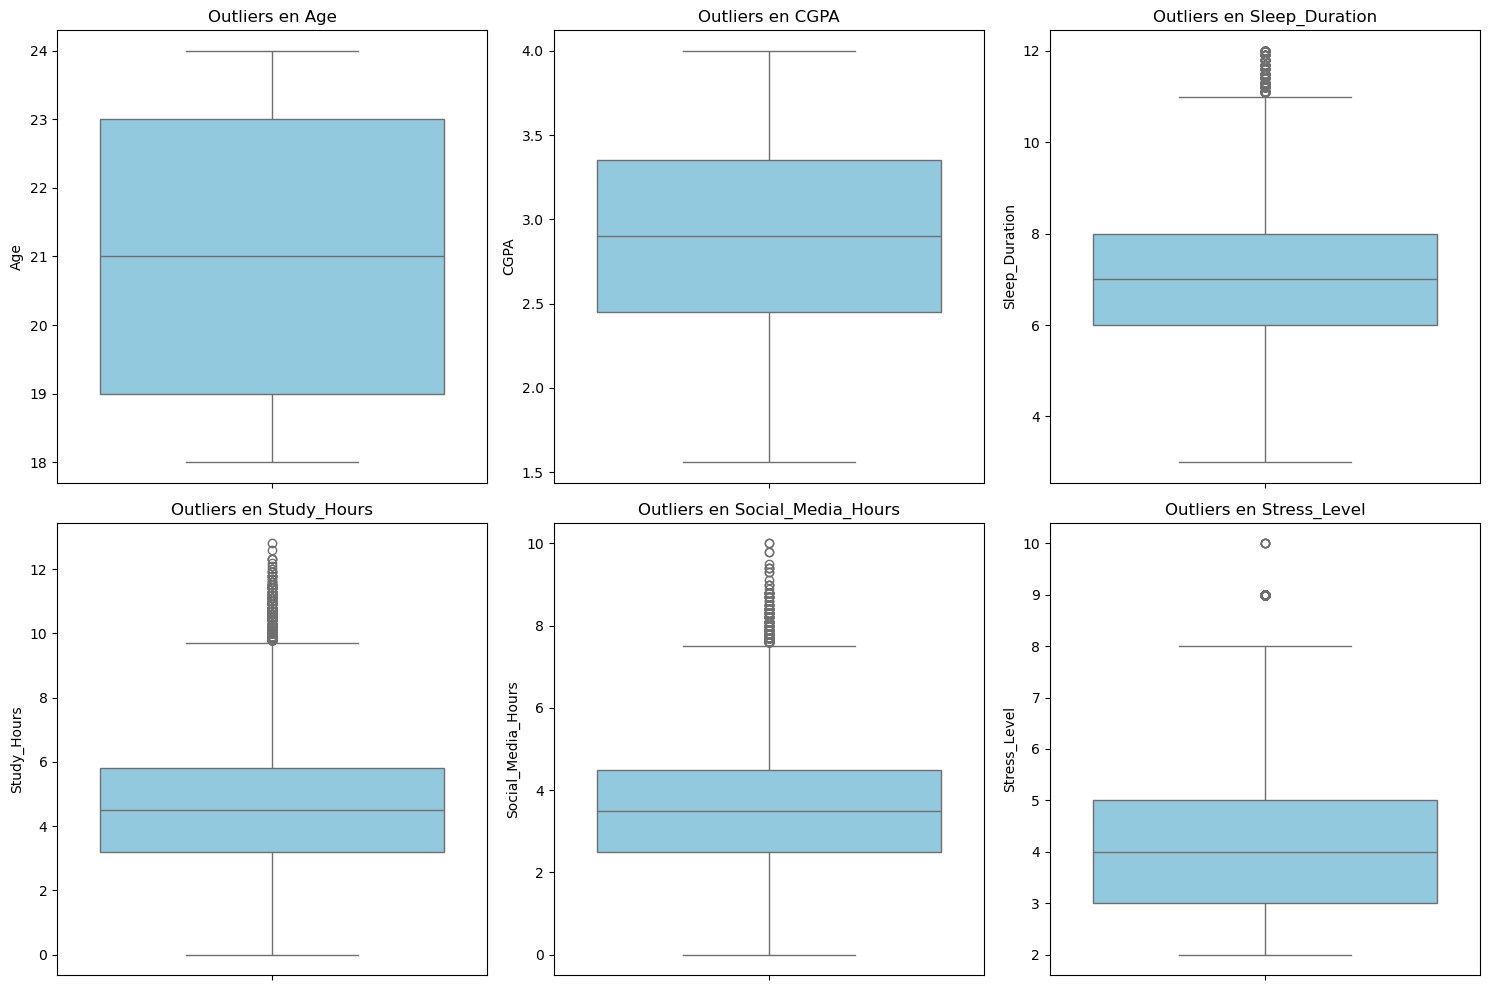

In [7]:
# Seleccionamos las columnas numéricas relevantes
cols_num = ['Age', 'CGPA', 'Sleep_Duration', 'Study_Hours', 'Social_Media_Hours', 'Stress_Level']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_num, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Outliers en {col}')

plt.tight_layout()
plt.show()

In [8]:
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0], lower_bound, upper_bound

for col in cols_num:
    n, low, high = count_outliers(df, col)
    print(f"{col}: {n} outliers detectados (Rango: {low:.2f} a {high:.2f})")

Age: 0 outliers detectados (Rango: 13.00 a 29.00)
CGPA: 0 outliers detectados (Rango: 1.10 a 4.70)
Sleep_Duration: 369 outliers detectados (Rango: 3.00 a 11.00)
Study_Hours: 432 outliers detectados (Rango: -0.70 a 9.70)
Social_Media_Hours: 328 outliers detectados (Rango: -0.50 a 7.50)
Stress_Level: 478 outliers detectados (Rango: 0.00 a 8.00)


como podemos ver ya es un dataset limpio sin ningucomo podemos ver es un dataset limpio sin ningun outlier fuera de lo normal o imposile, como horas negativas o tiempo negativo, todo esta dentro de lo que podemos trabajar sin problemas

# Analisis univariado

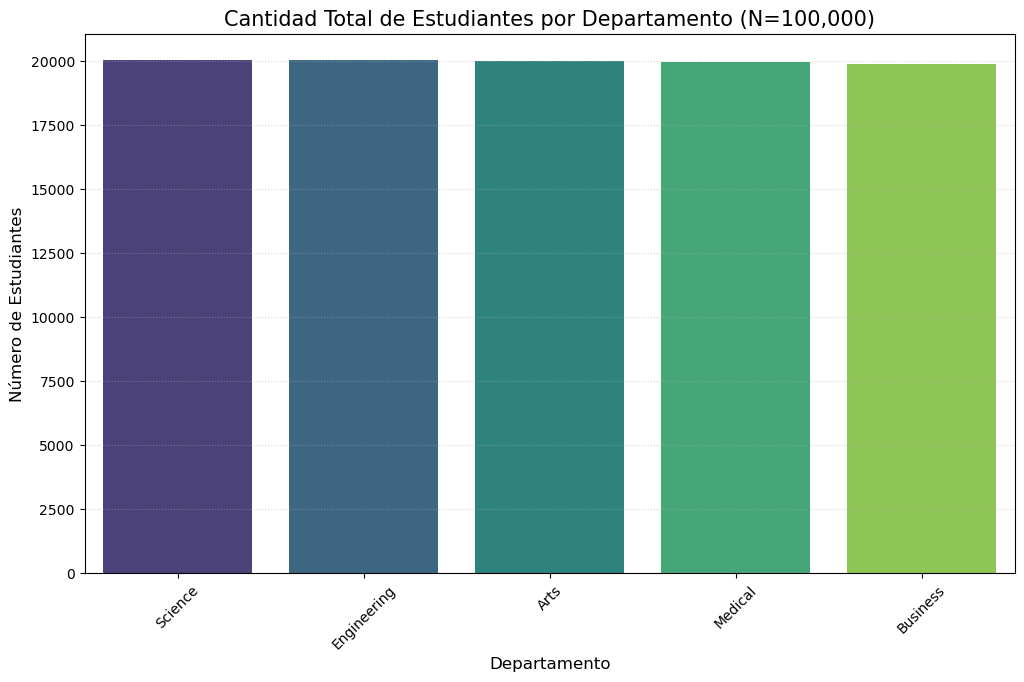

In [19]:
plt.figure(figsize=(12, 7))

# Usamos countplot para contar automáticamente cuántos registros hay por categoría
# 'order' asegura que las barras se vean de mayor a menor para mejor lectura
sns.countplot(
    data=df_clean, 
    x='Department', 
    order=df_clean['Department'].value_counts().index,
    palette='viridis'
)

plt.title('Cantidad Total de Estudiantes por Departamento (N=100,000)', fontsize=15)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Número de Estudiantes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.show()

In [23]:
conteo_carreras = df_clean['Department'].value_counts()

print("--- Cantidad de Alumnos por Carrera ---")
print(conteo_carreras)

print("\n--- Porcentaje por Carrera ---")
print(df_clean['Department'].value_counts(normalize=True) * 100)

--- Cantidad de Alumnos por Carrera ---
Department
Science        20071
Engineering    20057
Arts           19998
Medical        19964
Business       19910
Name: count, dtype: int64

--- Porcentaje por Carrera ---
Department
Science        20.071
Engineering    20.057
Arts           19.998
Medical        19.964
Business       19.910
Name: proportion, dtype: float64


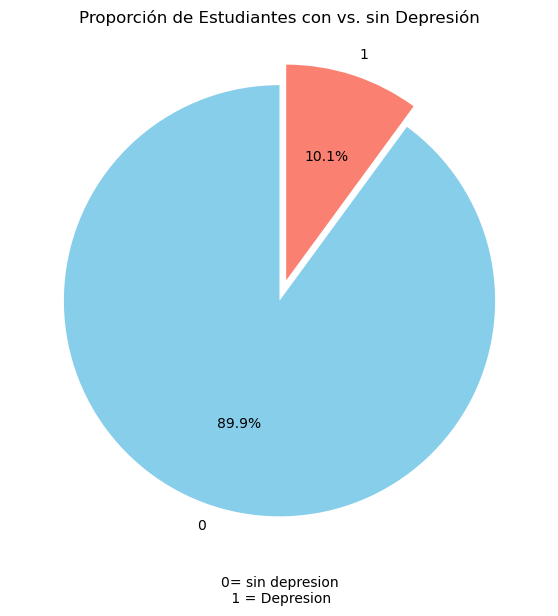

In [16]:
plt.figure(figsize=(7, 7))
df_clean['Depression'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, explode=(0, 0.1))
plt.title('Proporción de Estudiantes con vs. sin Depresión')
plt.ylabel('') 
plt.xlabel('0= sin depresion\n 1 = Depresion')
plt.show()

In [27]:
total_depresion = df_clean['Depression'].value_counts()
print("--- Conteo Total de Depresión ---")
print(total_depresion)

conteo_por_carrera = pd.crosstab(df_clean['Department'], df_clean['Depression'])
conteo_por_carrera.columns = ['No_Depression', 'Has_Depression']
print("\n--- Alumnos con y sin Depresión por Carrera ---")
print(conteo_por_carrera.sort_values(by='Has_Depression', ascending=False))

--- Conteo Total de Depresión ---
Depression
0    89938
1    10062
Name: count, dtype: int64

--- Alumnos con y sin Depresión por Carrera ---
             No_Depression  Has_Depression
Department                                
Arts                 17968            2030
Business             17882            2028
Engineering          18037            2020
Science              18074            1997
Medical              17977            1987


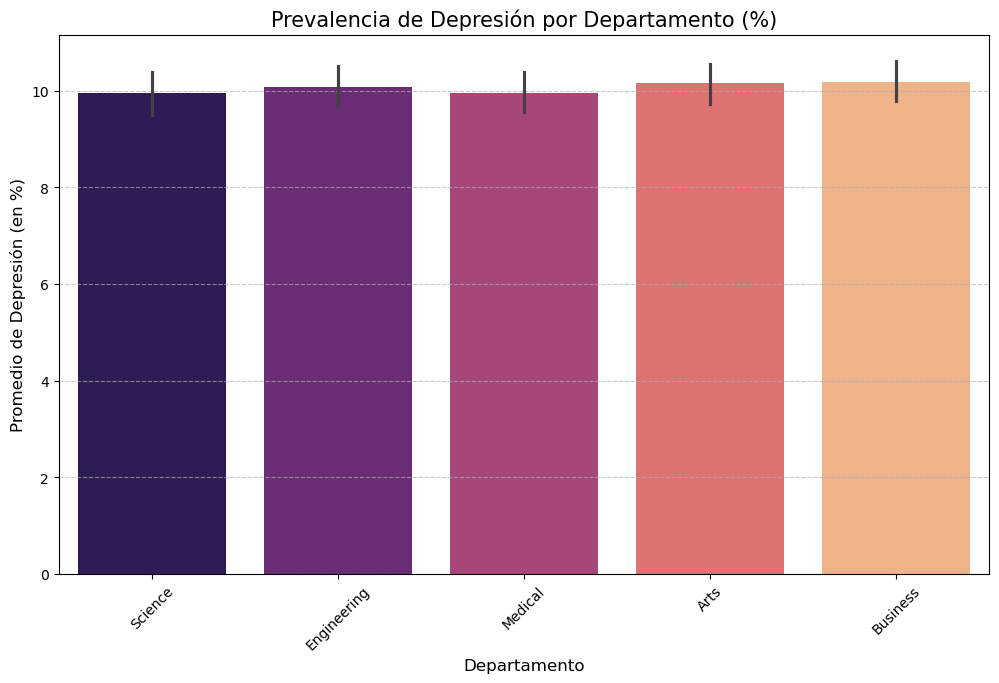

In [20]:

plt.figure(figsize=(12, 7))

sns.barplot(
    data=df_clean, 
    x='Department', 
    y='Depression', 
    estimator=lambda x: sum(x) / len(x) * 100, # esto lo hice para calcular el promedio
    palette='magma'
)


plt.title('Prevalencia de Depresión por Departamento (%)', fontsize=15)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Promedio de Depresión (en %)', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

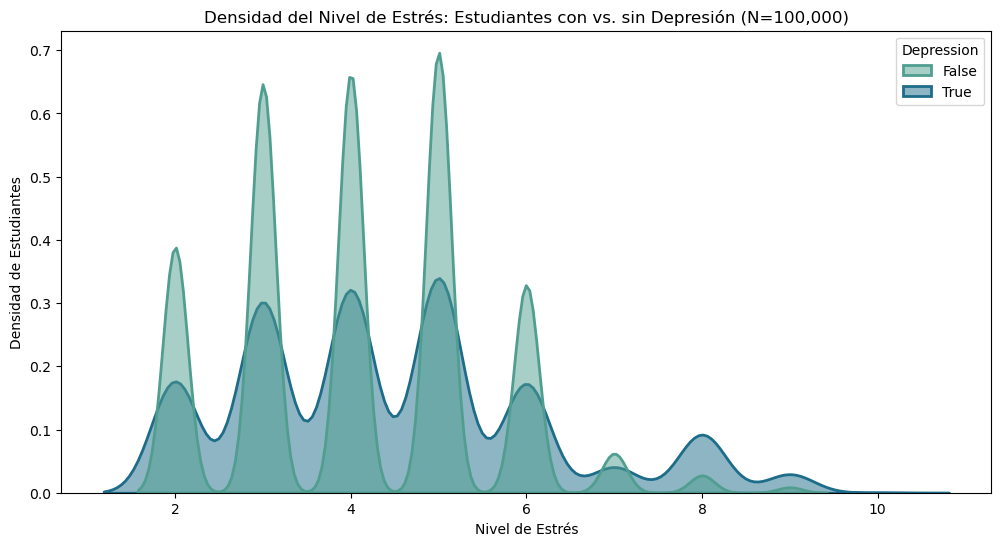

In [4]:
# Configuración para volumen masivo de datos
plt.figure(figsize=(12, 6))

# Comparar la distribución de Stress_Level para ambos gruposplt.figure(figsize=(7, 7))
df_clean['Depression'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, explode=(0, 0.1))
plt.title('Proporción de Estudiantes con vs. sin Depresión')
plt.ylabel('') # Eliminar etiqueta lateral
plt.show()
sns.kdeplot(data=df, x='Stress_Level', hue='Depression', fill=True, common_norm=False, palette='crest', alpha=.5, linewidth=2)

plt.title('Densidad del Nivel de Estrés: Estudiantes con vs. sin Depresión (N=100,000)')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Densidad de Estudiantes')
plt.show()

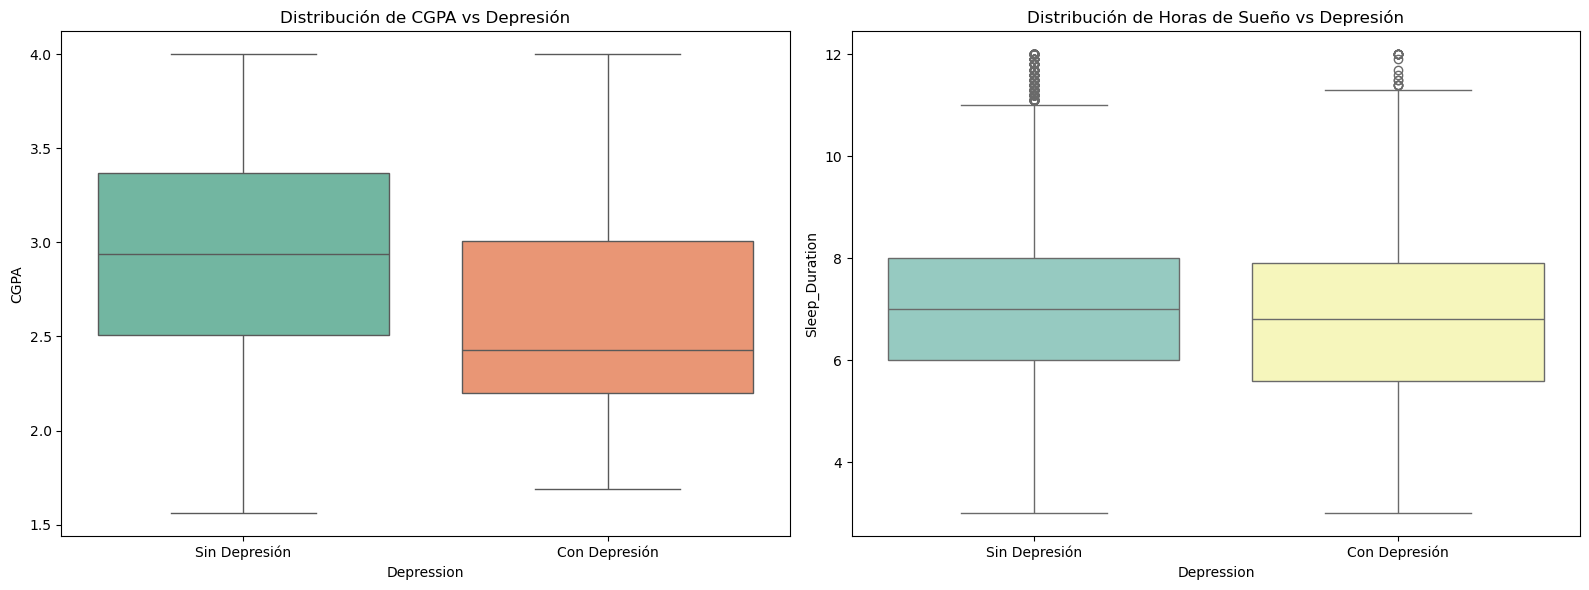

In [28]:


# Creamos una figura con dos espacios (subplots)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. Comparación de CGPA (Promedio Académico)
sns.boxplot(x='Depression', y='CGPA', data=df_clean, ax=ax[0], palette='Set2')
ax[0].set_title('Distribución de CGPA vs Depresión')
ax[0].set_xticklabels(['Sin Depresión', 'Con Depresión'])

# 2. Comparación de Sleep_Duration (Horas de Sueño)
sns.boxplot(x='Depression', y='Sleep_Duration', data=df_clean, ax=ax[1], palette='Set3')
ax[1].set_title('Distribución de Horas de Sueño vs Depresión')
ax[1].set_xticklabels(['Sin Depresión', 'Con Depresión'])

plt.tight_layout()
plt.show()

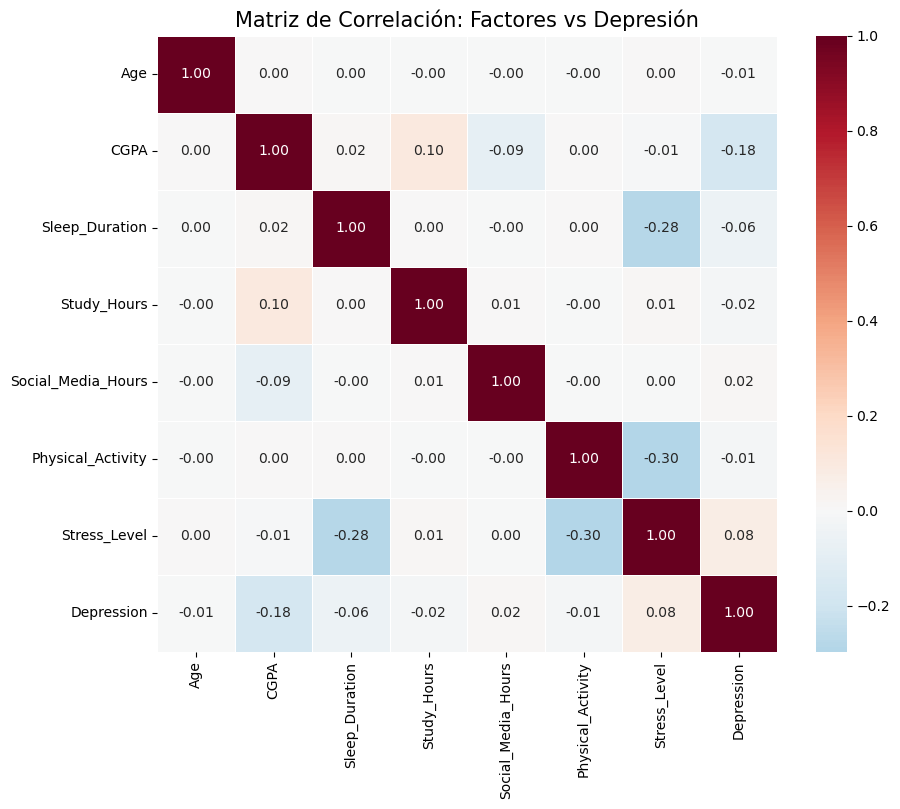

In [29]:

cols_to_corr = ['Age', 'CGPA', 'Sleep_Duration', 'Study_Hours', 
                'Social_Media_Hours', 'Physical_Activity', 
                'Stress_Level', 'Depression']

corr_matrix = df_clean[cols_to_corr].corr()

# 2. Graficamos el Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación: Factores vs Depresión', fontsize=15)
plt.show()

In [32]:

df_ml = pd.get_dummies(df_clean.drop('Student_ID', axis=1), drop_first=True)

X = df_ml.drop('Depression', axis=1)
y = df_ml['Depression']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:

modelo_depresion = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


modelo_depresion.fit(X_train, y_train)

print("¡Entrenamiento completado exitosamente!")

¡Entrenamiento completado exitosamente!



--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     17988
           1       0.45      0.01      0.02      2012

    accuracy                           0.90     20000
   macro avg       0.68      0.51      0.49     20000
weighted avg       0.86      0.90      0.85     20000



<Figure size 800x600 with 0 Axes>

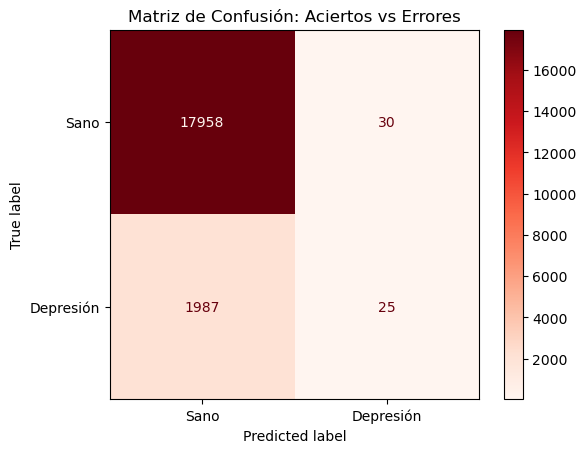

In [34]:
y_pred = modelo_depresion.predict(X_test)

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Reds', display_labels=['Sano', 'Depresión'])
plt.title('Matriz de Confusión: Aciertos vs Errores')
plt.show()

## Análisis de los Resultados del Modelo Base

Al observar los primeros resultados del entrenamiento, me encontré con una situación muy común pero peligrosa en ciencia de datos: la trampa del accuracy. Mi modelo muestra un 90% de precisión general, lo que a simple vista parecería un éxito rotundo. Sin embargo, al mirar el detalle, descubrí que para detectar la depresión (que es el objetivo real de este proyecto), el modelo es prácticamente inútil.
El problema del 0.01 de Recall

La métrica de Recall para los casos de depresión es de apenas 0.01. Esto significa que de cada 100 estudiantes que realmente sufren depresión, el modelo solo es capaz de identificar a uno.

¿Por qué pasó esto? Como el 90% de mi dataset son alumnos que no tienen depresión, el algoritmo aprendió que la forma más "fácil" de tener una calificación alta era decir que nadie tiene depresión. De esta forma, acierta en los 90,000 casos sanos, pero ignora por completo a los 10,000 que sí presentan síntomas.
Ajuste de estrategia

En un proyecto de salud mental, un error donde "se nos escapa" alguien que necesita ayuda es mucho más grave que dar una falsa alarma. No me sirve un modelo que sea un "espectador pasivo".

Por eso, he decidido reentrenar el modelo aplicando una técnica de pesos balanceados. La idea es "castigar" al modelo con mucha más fuerza cada vez que ignore un caso positivo de depresión, obligándolo a prestar atención a esos patrones, incluso si eso significa que el porcentaje de precisión general baje un poco. El objetivo es cambiar un modelo "cómodo" por uno que sea realmente útil para la prevención.


--- NUEVO Reporte de Clasificación (Balanceado) ---
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     17988
           1       0.22      0.61      0.32      2012

    accuracy                           0.74     20000
   macro avg       0.58      0.68      0.58     20000
weighted avg       0.87      0.74      0.79     20000



<Figure size 800x600 with 0 Axes>

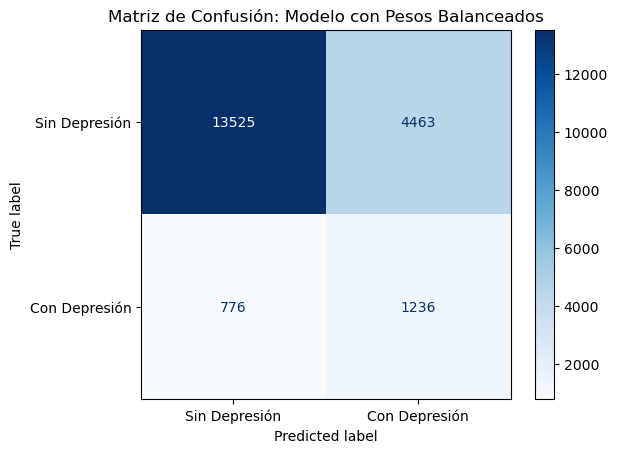

In [42]:
# 1. Calculamos pesos manuales (le daremos unas 9 veces más importancia a la depresión)
pesos = {0: 1, 1: 9} 

# 2. Re-entrenamos el modelo con estos nuevos pesos
modelo_balanceado = RandomForestClassifier(
    n_estimators=200, # Más árboles para mayor precisión
    class_weight=pesos, 
    max_depth=10,      # Limitamos profundidad para que no memorice
    random_state=42
)

modelo_balanceado.fit(X_train, y_train)

# 3. Nueva predicción
y_pred_bal = modelo_balanceado.predict(X_test)

# 4. Ver los nuevos resultados
print("\n--- NUEVO Reporte de Clasificación (Balanceado) ---")
print(classification_report(y_test, y_pred_bal))

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_bal, 
    cmap='Blues', 
    display_labels=['Sin Depresión', 'Con Depresión'],
    values_format='d' 
)

plt.title('Matriz de Confusión: Modelo con Pesos Balanceados')
plt.grid(False)
plt.show()

In [45]:
importances = modelo_balanceado.feature_importances_
features = X.columns
importancia_df = pd.DataFrame({'Variable': features, 'Importancia': importances}).sort_values(by='Importancia', ascending=False)

print("Top 5 variables que más afectan la predicción:")
print(importancia_df.head(5))

Top 5 variables que más afectan la predicción:
            Variable  Importancia
2               CGPA     0.588338
7       Stress_Level     0.115441
3     Sleep_Duration     0.090103
6  Physical_Activity     0.053445
4        Study_Hours     0.053434


--- Variables con mayor impacto en la Depresión ---
            Variable  Importancia
2               CGPA     0.588338
7       Stress_Level     0.115441
3     Sleep_Duration     0.090103
6  Physical_Activity     0.053445
4        Study_Hours     0.053434


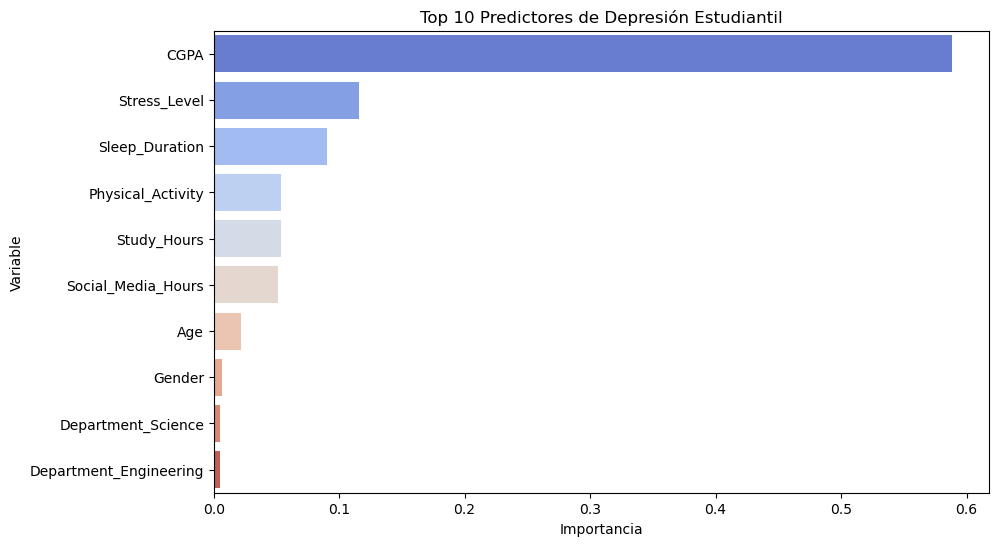

In [44]:
importances = modelo_balanceado.feature_importances_
feature_names = X.columns

importancia_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print("--- Variables con mayor impacto en la Depresión ---")
print(importancia_df.head(5))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_df.head(10), palette='coolwarm')
plt.title('Top 10 Predictores de Depresión Estudiantil')
plt.show()

# Simulador predictivo

In [49]:
def predecir_depresion(edad, genero, cgpa, sueno, estudio, redes, ejercicio, estres, carrera):
    datos_nuevo = {
        'Age': [edad],
        'Gender': [0 if genero.lower() == 'male' else 1],
        'CGPA': [cgpa],
        'Sleep_Duration': [sueno],
        'Study_Hours': [estudio],
        'Social_Media_Hours': [redes],
        'Physical_Activity': [ejercicio],
        'Stress_Level': [estres]
    }
    
    df_nuevo = pd.DataFrame(datos_nuevo)
    

    for col in X.columns:
        if "Department_" in col:
            df_nuevo[col] = 0
    
    col_carrera = f'Department_{carrera}'
    if col_carrera in df_nuevo.columns:
        df_nuevo[col_carrera] = 1
        
    df_nuevo = df_nuevo[X.columns]
    
    pred = modelo_balanceado.predict(df_nuevo)[0]
    prob = modelo_balanceado.predict_proba(df_nuevo)[0][1] # Probabilidad de riesgo
    
    print(f"--- Resultado del Análisis ---")
    if pred == 1:
        print(f" XXXX RIESGO DETECTADO (Probabilidad: {prob:.2%})")
        print("Se recomienda seguimiento profesional.")
    else:
        print(f":) SIN RIESGO APARENTE (Probabilidad: {prob:.2%})")
    print("------------------------------")

# --- PRUEBA EL SIMULADOR AQUÍ ---

predecir_depresion(edad=21, genero='male', cgpa=2.1, sueno=4, estudio=8, 
                   redes=5, ejercicio=1, estres=9, carrera='Engineering')

--- Resultado del Análisis ---
 XXXX RIESGO DETECTADO (Probabilidad: 59.47%)
Se recomienda seguimiento profesional.
------------------------------


### Simulador Manual

In [48]:
print("--- Formulario de Evaluación Estudiantil ---")
try:
    # Captura de datos manual
    e = int(input("Edad: "))
    g = input("Género (Male/Female): ")
    c = float(input("CGPA (Promedio): "))
    s = float(input("Horas de sueño diarias: "))
    h = float(input("Horas de estudio diarias: "))
    r = float(input("Horas en redes sociales: "))
    ej = float(input("Horas de actividad física: "))
    es = int(input("Nivel de Estrés (1-10): "))
    dept = input("Departamento (ej. Engineering, Business, Arts, Science): ")

    # Ejecutar la predicción con los datos capturados
    print("\nProcesando información...")
    predecir_depresion(edad=e, genero=g, cgpa=c, sueno=s, estudio=h, 
                       redes=r, ejercicio=ej, estres=es, carrera=dept)

except ValueError:
    print("❌ Error: Por favor ingresa valores numéricos donde se solicita.")
except Exception as err:
    print(f"❌ Ocurrió un error inesperado: {err}")

--- Formulario de Evaluación Estudiantil ---


Edad:  21
Género (Male/Female):  male
CGPA (Promedio):  2.1
Horas de sueño diarias:  4
Horas de estudio diarias:  8
Horas en redes sociales:  5
Horas de actividad física:  1
Nivel de Estrés (1-10):  9
Departamento (ej. Engineering, Business, Arts, Science):  Engineering



Procesando información...
--- Resultado del Análisis ---
⚠️ RIESGO DETECTADO (Probabilidad: 59.47%)
Se recomienda seguimiento profesional.
------------------------------
